In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

from importlib import reload

import sys
sys.path.append('.')
import lib as l

In [53]:
# Display fns
def perf_prices_ts(data, perf_id):
    prs = data['price'][data['price'].performanceId == perf_id]
    plt.figure(figsize=(12,5))
    for cat in prs.category.unique():
        d = prs[prs.category == cat]
        plt.plot(d.crawl_startTime, d.price, label=cat)
        
    plt.legend()
    plt.show()

def show_pricings(data, show_id):
    # List perfs
    show_perfs = data['performance'][data['performance'].showId == show_id]
    # Get categs for show (from 1st perf)
    fpid = show_perfs.iloc[0].id
    cats = data['performance_prices'][data['performance_prices'].performanceId == fpid].category.values
    
    show = data['show'][data['show'].id == show_id].iloc[0]

    for cat in cats:
        tmp = pd.merge(show_perfs, data['performance_prices'][data['performance_prices']['category'] == cat], left_on='id', right_on='performanceId', how='left')
        plt.plot(tmp.date.apply(lambda x: x.timestamp()), tmp.price, 'o--',label=cat)
        plt.xticks(tmp.date.apply(lambda x: x.timestamp()), tmp.date.apply(lambda d: d.strftime("%a %-d/%-m")), rotation='vertical')
    plt.legend()
    plt.show()

In [98]:
reload(l)
data = l.load_data()

In [ ]:
dgs = data['generics']
print("CRAWL INFO:\n- {} crawls\n- From {} to {} ({})\n- {} errors".format(
    dgs['crawl_nb'],
    dgs['crawl_from'],
    dgs['crawl_to'],
    dgs['crawl_frame'],
    dgs['crawl_err_nb'])
)

# data['show'][data['show'].type =='opera'][['id', 'title', 'location', 'startDate', 'comp_performance_nb']].sort_values(by='startDate')

In [ ]:
# Erros
l.error_info(data['crawl'])

### Are the prices per category fixed for a given performance ?

In [99]:
counts = data['price'].groupby(['performanceId', 'category']).apply(lambda gp: len(gp.price.value_counts()))
counts[counts > 1]


performanceId  category
71             Cat5        2
76             Cat5        2
dtype: int64

In [ ]:
perf_prices_ts(data, 71)
perf_prices_ts(data, 76)

### Are available categories for a show fixed ?
- for a given perf, always the same categs ? => get categories per performance.
- for a given show, always same categs accross performances ? => get categories per show.

#### Are categs stable per performance ?

In [101]:
# Are categs stable per performance ?
cats_perf_crawl = data['price'].groupby(by=['performanceId', 'crawlId']).category.apply(lambda x: ','.join(sorted(x.values))).reset_index()
# nb of different sets of categs found for categs
counts = cats_perf_crawl.groupby(by='performanceId').category.apply(lambda x: len(x.unique()))

print('Nb of performances with variations on the categ list: ' + str(len(counts[counts > 1])))

# Which perfs have more than one set ?
for pid in counts[counts > 1].index:
    l.perf_info(data, pid);

Nb of performances with variations on the categ list: 0


In [102]:
cats_perf_crawl.groupby(by='performanceId').category.

In [87]:
# pr = data['price']
#pd.DataFrame(pr[pr.performanceId == 320].groupby(by='crawl_startTime').apply(lambda x: ','.join(sorted(x.category.values))))

        

,0
crawl_startTime,
2017-05-23 09:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 10:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 11:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 12:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 13:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 14:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 15:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 16:28:01,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"
2017-05-23 17:28:00,"Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima"


### Prices Vs performance date

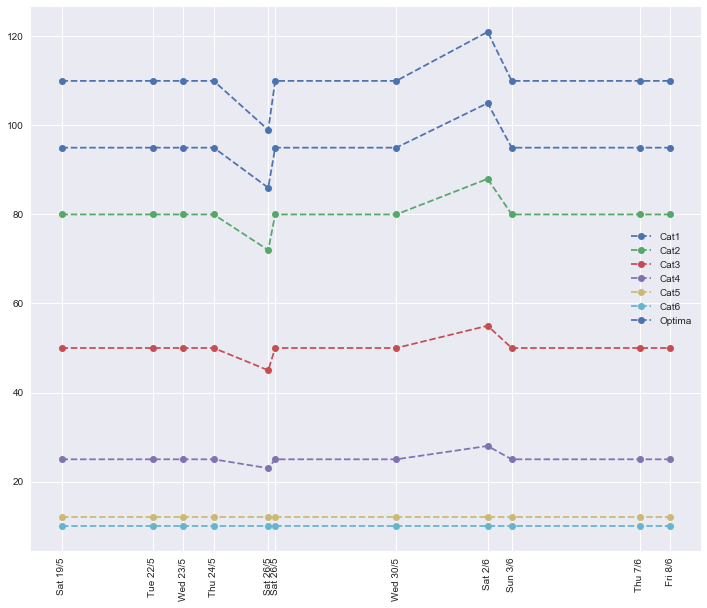

In [83]:
perf_prices_per_date(data, 31)

Questions :
- Prix constants par représentation et par catégorie
- Distribution des prix par jour de la semaine
    - single show: plot prices as function of weekday
    - do stats for all opera/ballet shows
 
 

In [4]:
shows

,id,slug,type,title,author,location,saleStartDate,saleOpen,startDate,endDate,runlength,performances,presale_time
32,33,robbins-balanchine-cherkaoui-jalet,ballet,"robbins /​ balanchine /​ cherkaoui, jalet",None,Palais Garnier,None,True,2017-05-02,2017-05-27,25 days,5,NaT
41,42,bertaud-bouche-paul-valastro,ballet,Bertaud /​ bouché /​ paul /​ valastro,None,Palais Garnier,None,True,2017-06-13,2017-06-18,5 days,4,NaT
35,36,drumming-live,ballet,anne teresa de keersmaeker,Drumming Live,Opéra Bastille,None,True,2017-07-01,2017-07-15,14 days,10,NaT
42,43,la-sylphide,ballet,la sylphide,Pierre Lacotte,Palais Garnier,None,True,2017-07-01,2017-07-16,15 days,11,NaT
31,32,gala,ballet,Gala,Ouverture de la saison de danse,Palais Garnier,None,True,2017-09-21,2017-09-21,0 days,1,NaT
29,30,joyaux,ballet,joyaux,George Balanchine,Palais Garnier,2017-05-30,True,2017-09-22,2017-10-12,20 days,15,115 days
34,35,balanchine-teshigawara-bausch,ballet,Balanchine /​ teshigawara /​ bausch,None,Palais Garnier,2017-06-13,False,2017-10-25,2017-11-16,22 days,13,134 days
26,27,play,ballet,Play,None,Palais Garnier,2017-06-20,False,2017-12-06,2017-12-31,25 days,19,169 days
25,26,demonstrations-de-lecole-de-danse,ballet,démonstrations de lécole de danse,None,Palais Garnier,2017-11-07,False,2017-12-10,2017-12-23,13 days,6,33 days
27,28,don-quichotte,ballet,don quichotte,Rudolf Noureev,Opéra Bastille,2017-06-20,False,2017-12-11,2018-01-06,26 days,18,174 days


In [29]:
s17opera = shows[shows.apply(lambda x: x.saleStartDate is not None and x.type == 'opera', axis=1)].copy()
s17ballet = shows[shows.apply(lambda x: x.saleStartDate is not None and x.type == 'ballet', axis=1)].copy()

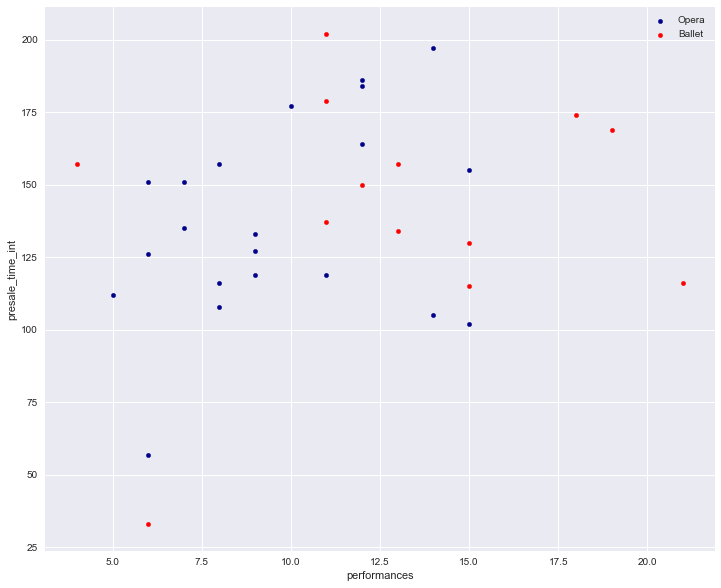

In [45]:
s17opera['presale_time_int'] = s17opera.presale_time.apply(lambda x: x.days)
s17ballet['presale_time_int'] = s17ballet.presale_time.apply(lambda x: x.days)
ax = s17opera.plot.scatter(x='performances', y='presale_time_int', color='DarkBlue', label='Opera');
s17ballet.plot.scatter(x='performances', y='presale_time_int', color='Red', label='Ballet', ax=ax);

# Sans rapport vraiment. avec le nombre de performances ...